In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from pandas.plotting import scatter_matrix
from sklearn import metrics
%matplotlib inline

In [5]:
data = pd.read_csv("./data/ratio_all_data.csv")

In [6]:
data

,Compound,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio
0,Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743
1,Control \n1% DMSO,3.394,0.451,0.182,0.034,0.132882,0.053624,0.010018
2,C1,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915
3,C3,3.327,0.419,0.198,0.031,0.125939,0.059513,0.009318
4,C4,2.975,0.423,0.187,0.032,0.142185,0.062857,0.010756
...,...,...,...,...,...,...,...,...
71,C153,3.237,0.511,0.242,0.032,0.157862,0.074761,0.009886
72,C156,3.374,0.444,0.209,0.035,0.131595,0.061944,0.010373
73,C157,3.375,0.392,0.180,0.029,0.116148,0.053333,0.008593
74,C158,3.516,0.381,0.164,0.034,0.108362,0.046644,0.009670


In [8]:
data = data.set_index("Compound")
data.index.name = None
data

,Median length- mm,Median YOLKSAC BREADTH (mm),Median Yolk sac area(mm2),Median Eye area(mm2),Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio
Control Fish water,3.317,0.487,0.186,0.029,0.146819,0.056075,0.008743
Control \n1% DMSO,3.394,0.451,0.182,0.034,0.132882,0.053624,0.010018
C1,3.115,0.436,0.187,0.034,0.139968,0.060032,0.010915
C3,3.327,0.419,0.198,0.031,0.125939,0.059513,0.009318
C4,2.975,0.423,0.187,0.032,0.142185,0.062857,0.010756
...,...,...,...,...,...,...,...
C153,3.237,0.511,0.242,0.032,0.157862,0.074761,0.009886
C156,3.374,0.444,0.209,0.035,0.131595,0.061944,0.010373
C157,3.375,0.392,0.180,0.029,0.116148,0.053333,0.008593
C158,3.516,0.381,0.164,0.034,0.108362,0.046644,0.009670


In [9]:
ratio_data = data[["Median length- mm", "Median YOLKSAC BREADTH Ratio", "Median Yolk sac area Ratio", "Median Eye area Ratio"]]
ratio_data

,Median length- mm,Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio
Control Fish water,3.317,0.146819,0.056075,0.008743
Control \n1% DMSO,3.394,0.132882,0.053624,0.010018
C1,3.115,0.139968,0.060032,0.010915
C3,3.327,0.125939,0.059513,0.009318
C4,2.975,0.142185,0.062857,0.010756
...,...,...,...,...
C153,3.237,0.157862,0.074761,0.009886
C156,3.374,0.131595,0.061944,0.010373
C157,3.375,0.116148,0.053333,0.008593
C158,3.516,0.108362,0.046644,0.009670


In [10]:
ratio_data.to_csv("./data/complete_ratio.csv")

In [12]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(ratio_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [22]:
pca_dbscan = DBSCAN(eps=0.03, min_samples=3).fit(principalDf)

In [23]:
labels = pca_dbscan.labels_
principalDf['pca_eps0.03_min3'] = labels

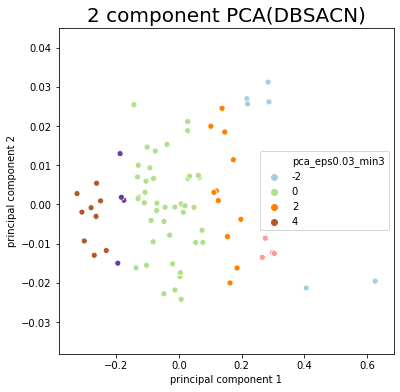

In [24]:
fig = plt.figure(figsize = (6,6))
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', hue='pca_eps0.03_min3', palette='Paired')
plt.title('2 component PCA(DBSACN)', fontsize = 20)
plt.savefig("./picture/pca_eps0.03_min3.png", dpi=300)
plt.show()

In [26]:
data = pd.read_csv("./data/complete_ratio.csv")

In [27]:
pca_data_all = pd.concat([data, principalDf], axis=1)
pca_data_all

,Unnamed: 0,Median length- mm,Median YOLKSAC BREADTH Ratio,Median Yolk sac area Ratio,Median Eye area Ratio,principal component 1,principal component 2,pca_eps0.03_min3
0,Control Fish water,3.317,0.146819,0.056075,0.008743,0.065162,0.006905,0
1,Control \n1% DMSO,3.394,0.132882,0.053624,0.010018,-0.012689,-0.000661,0
2,C1,3.115,0.139968,0.060032,0.010915,0.266149,-0.013493,1
3,C3,3.327,0.125939,0.059513,0.009318,0.053763,-0.009715,0
4,C4,2.975,0.142185,0.062857,0.010756,0.405958,-0.021307,-1
...,...,...,...,...,...,...,...,...
71,C153,3.237,0.157862,0.074761,0.009886,0.146264,0.018476,2
72,C156,3.374,0.131595,0.061944,0.010373,0.007395,0.000115,0
73,C157,3.375,0.116148,0.053333,0.008593,0.005015,-0.017393,0
74,C158,3.516,0.108362,0.046644,0.009670,-0.136309,-0.016160,0


In [28]:
pca_data_all.to_csv("./data/pca_eps0.03_min3_no_sort_values.csv")
pca_data_all.sort_values("pca_eps0.03_min3").to_csv("./data/pca_eps0.03_min3.csv")